In [62]:
import numpy as np
from pyDOE import lhs
import matplotlib.pyplot as plt

In [149]:
# Numer of collocation points
Nx = 50
Ny = 50
# Domaine physique
x1 = -20.0
x2 = 20

In [120]:
tile = np.zeros(Nx)

### Regular distribution

In [147]:
X_regular = np.linspace(x1,x2,num=Nx, dtype=np.float32)

In [122]:
X_regular

array([-20.        , -19.183674  , -18.367348  , -17.55102   ,
       -16.734694  , -15.918367  , -15.102041  , -14.285714  ,
       -13.469388  , -12.653061  , -11.836735  , -11.020409  ,
       -10.204082  ,  -9.387755  ,  -8.571428  ,  -7.755102  ,
        -6.9387755 ,  -6.122449  ,  -5.3061223 ,  -4.4897957 ,
        -3.6734693 ,  -2.857143  ,  -2.0408163 ,  -1.2244898 ,
        -0.40816328,   0.40816328,   1.2244898 ,   2.0408163 ,
         2.857143  ,   3.6734693 ,   4.4897957 ,   5.3061223 ,
         6.122449  ,   6.9387755 ,   7.755102  ,   8.571428  ,
         9.387755  ,  10.204082  ,  11.020409  ,  11.836735  ,
        12.653061  ,  13.469388  ,  14.285714  ,  15.102041  ,
        15.918367  ,  16.734694  ,  17.55102   ,  18.367348  ,
        19.183674  ,  20.        ], dtype=float32)

In [159]:
x_values = np.linspace(x1, x2, Nx)
y_values = np.linspace(x1, x2, Ny)

# Generate a 2D grid using meshgrid
x_2d, y_2d = np.meshgrid(x_values, y_values)

# Stack the grids to create a 2D array
regular_2d_array = np.stack((x_2d, y_2d), axis=-1)

### Random distribution

In [155]:
random_array = np.linspace(x1+1, x2-1, Nx)

In [156]:
random_array += np.random.uniform(-1, 1, Nx)

In [157]:
random_array = np.sort(random_array)

In [158]:
random_array_2 = np.random.uniform(x1, x2, (Nx,Ny))
random_array_2 = np.sort(random_array_2)

### LHS Distribution

In [126]:
lhs_samples = lhs(1, samples=Nx, criterion="maximin")

In [127]:
lhs_array = x1 + lhs_samples * (x2 - x1)

In [128]:
lhs_array = lhs_array.flatten()

In [168]:
lhs_array = np.float32(np.sort(lhs_array))

In [166]:
lhs_samples_2 = lhs(2, samples=Nx, criterion="maximin", iterations=1000)
lhs_samples_2 = x1 + lhs_samples_2 * (x2 - x1)
lhs_samples_2 = np.sort(lhs_samples_2)

### Sobol Distribution

In [130]:
from sobol_seq import i4_sobol_generate

In [131]:
sobol_samples = i4_sobol_generate(1, Nx)

In [132]:
sobol_array = x1 + sobol_samples.flatten() * (x2 - x1)

In [133]:
sobol_array = np.sort(sobol_array)

In [134]:
sobol_array

array([-18.75 , -18.125, -17.5  , -16.875, -16.25 , -15.625, -15.   ,
       -13.75 , -13.125, -12.5  , -11.25 , -10.625, -10.   ,  -8.75 ,
        -8.125,  -7.5  ,  -6.25 ,  -5.625,  -5.   ,  -3.75 ,  -3.125,
        -2.5  ,  -1.25 ,  -0.625,   0.   ,   1.25 ,   1.875,   2.5  ,
         3.125,   3.75 ,   4.375,   5.   ,   6.25 ,   6.875,   7.5  ,
         8.75 ,   9.375,  10.   ,  11.25 ,  11.875,  12.5  ,  13.125,
        13.75 ,  14.375,  15.   ,  16.25 ,  16.875,  17.5  ,  18.75 ,
        19.375])

### Triangular distribution

In [135]:
triangular_array = np.random.triangular(x1, 0, x2, Nx)

In [136]:
triangular_array = np.sort(triangular_array)

### Plot histograms

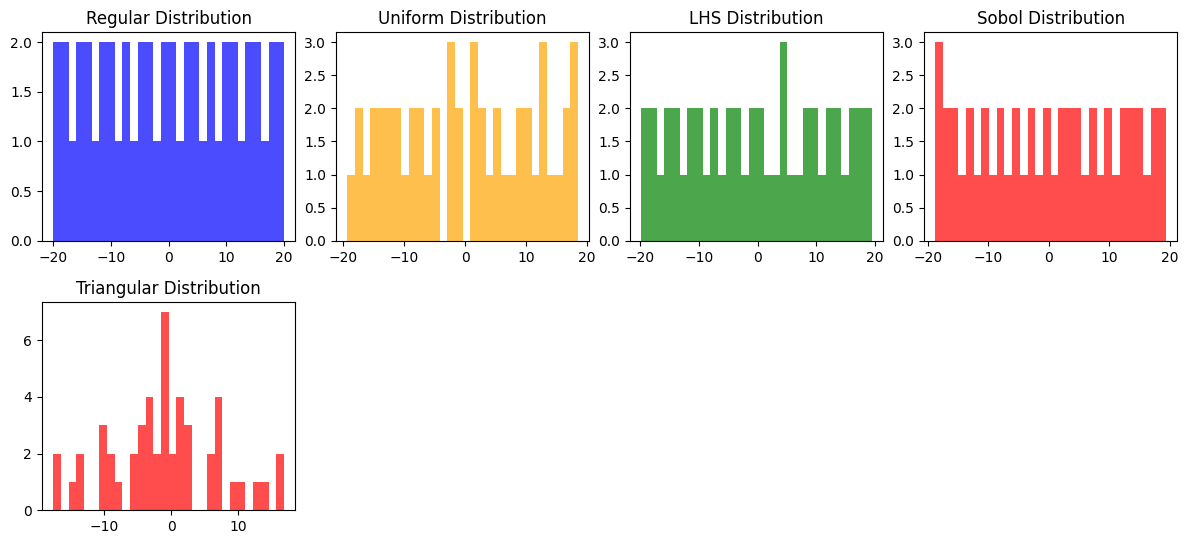

In [137]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 4, 1)
plt.hist(X_regular, bins=30, color='blue', alpha=0.7)
plt.title('Regular Distribution')

plt.subplot(3, 4, 2)
plt.hist(random_array, bins=30, color='orange', alpha=0.7)
plt.title('Uniform Distribution')

plt.subplot(3, 4, 3)
plt.hist(lhs_array, bins=30, color='green', alpha=0.7)
plt.title('LHS Distribution')

plt.subplot(3, 4, 4)
plt.hist(sobol_array, bins=30, color='red', alpha=0.7)
plt.title('Sobol Distribution')

plt.subplot(3, 4, 5)
plt.hist(triangular_array, bins=30, color='red', alpha=0.7)
plt.title('Triangular Distribution')

plt.tight_layout()
plt.show()

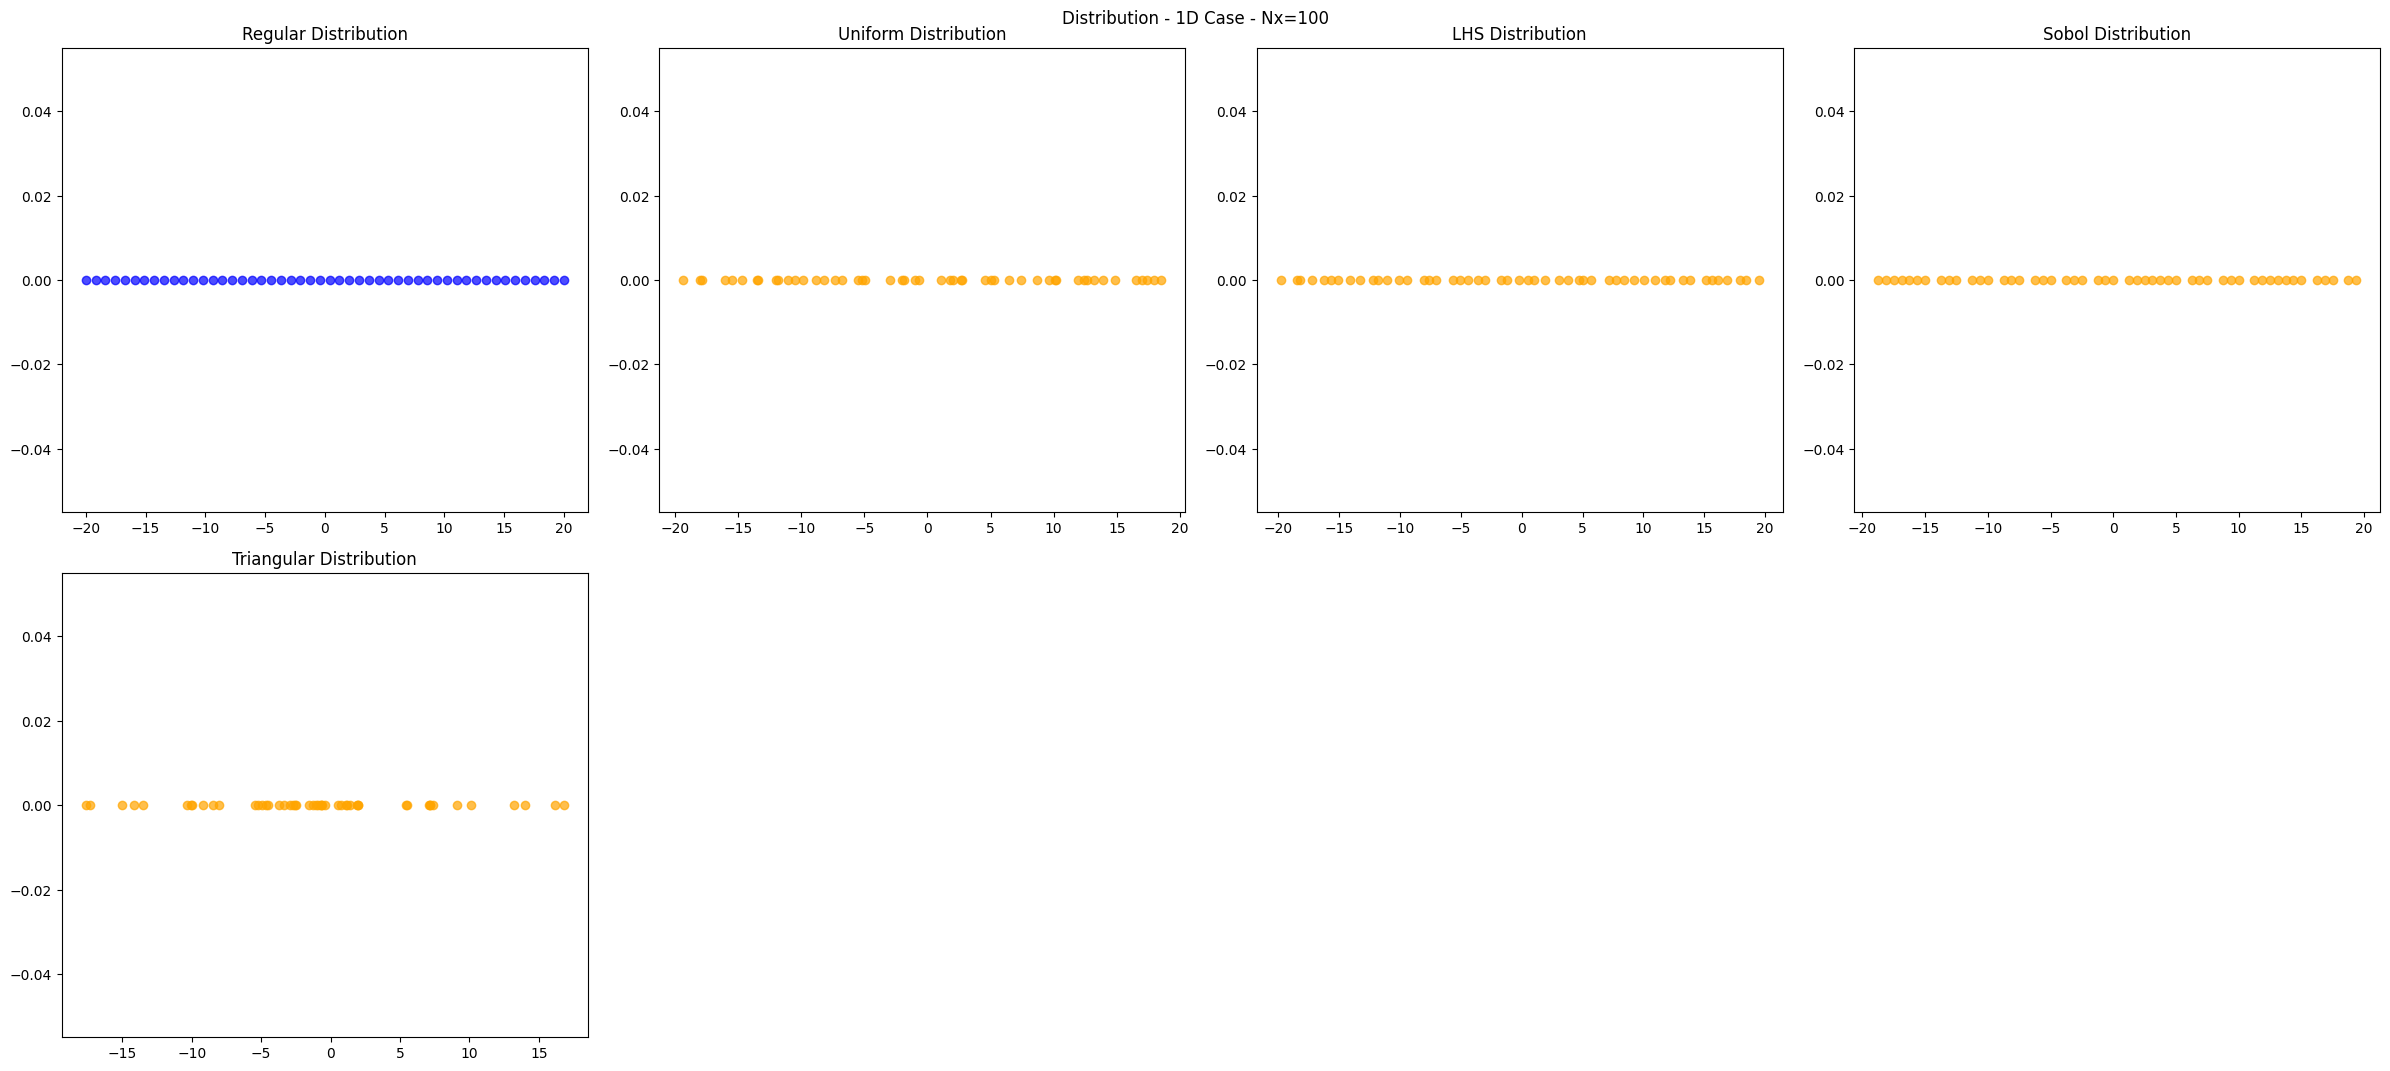

In [145]:
# Create scatter plots
plt.figure(figsize=(24, 16))

plt.subplot(3, 4, 1)
plt.scatter(X_regular,tile, color='blue', alpha=0.7)
plt.title('Regular Distribution')

plt.subplot(3, 4, 2)
plt.scatter(random_array,tile, color='orange', alpha=0.7)
plt.title('Uniform Distribution')

plt.subplot(3, 4, 3)
plt.scatter(lhs_array, tile, color='orange', alpha=0.7)
plt.title('LHS Distribution')

plt.subplot(3, 4, 4)
plt.scatter(sobol_array, tile, color='orange', alpha=0.7)
plt.title('Sobol Distribution')

plt.subplot(3, 4, 5)
plt.scatter(triangular_array,tile, color='orange', alpha=0.7)
plt.title('Triangular Distribution')

plt.suptitle('Distribution - 1D Case - Nx=100')
plt.tight_layout()
plt.show()